In [1]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def Cost(self):
        hinge_loss = np.mean([max(0, 1 - x * y) for x, y in zip(self.y, self.predict(self.X))])
        cost = self.lambda_param * np.sum(self.w ** 2) + hinge_loss
        return cost
    
    def f(self, x):
        return np.dot(x, self.w) + self.b
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for k in range(self.n_iters):
            for i in range(len(self.X)):
                if y[i] * self.f(X)[i] >= 1:
                    der_w = 2 * self.lambda_param * self.w
                    der_b = 0
                else:
                    der_w = 2 * self.lambda_param * self.w - y[i] * X[i]
                    der_b = y[i]
                self.w -= self.lr * der_w
                self.b -= self.lr * der_b / self.X.shape[1]
        return self      

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            yp = np.sign(np.dot(X[i], self.w))
            y_pred = np.append(y_pred, yp)        
        return np.array(y_pred)

In [2]:

from sklearn.datasets import make_blobs
import numpy as np 
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [4]:
svm = SVM(n_iters=1000, learning_rate=0.01)
svm.fit(X_train, y_train)

In [5]:
y_pred = svm.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

[0.63594875 0.15234712] -0.08550000000000006
0.0042764046064341765


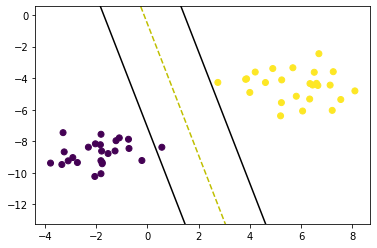

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
 
print(clf.w, clf.b)
print(clf.Cost())

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()